In [1]:
from array import array
import math
import numpy as np
from scipy import stats

In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x

In [3]:
m = 1 #Set the order of the polynomial
n = 15 #Set the number of data points
#jitter = array('d')
#jitter = [-.2,.2,-.1,.1,.0,-.2,.2,-.1,.1,.0,-.2,.2,-.1,.1,.0]
jitter = array('d')
jitter = [.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0,.0]
#growing errors
#sigma = array('d')
#sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
#constraining endpoints
#sigma = array('d')
#sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
#determining zero crossing
#sigma = array('d')
#sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
#positive values - slope
#sigma = array('d')
#sigma = [1,1,2,2,3,3,4,4,5,5,6,6,7,7,8]
#positive values - intercept
sigma = array('d')
sigma = [8,7,7,6,6,5,5,4,4,3,3,2,2,1,1]

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
par = array('d')
par.append(1.80)
par.append(4.05)

for i in range(0,n):
    #x.append(-4.0+8.0*i/n)
    x.append(0.0+8.0*i/n)
    y.append(generator_function(x[i],par)+jitter[i])
    ex.append(0.0)
    ey.append(sigma[i])

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [8]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print (r_value*r_value)


A matrix = 
[[  6.07843821  38.92723205]
 [ 38.92723205 262.63329927]]
V matrix = 
[[ 168.59647857]
 [1133.73387973]]
A_inverse = 
[[ 3.23955136 -0.4801629 ]
 [-0.4801629   0.07497683]]
Diagonal Check:
[[1.00000000e+00 4.80404374e-16]
 [9.73195807e-15 1.00000000e+00]]
Coefficients:
[[1.8 ]
 [4.05]]
0.9999999999999998


In [9]:
yfit = 0
chi2 = 0
for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

i = 0  y = 1.800000  yfit = 1.800000
i = 1  y = 3.960000  yfit = 3.960000
i = 2  y = 6.120000  yfit = 6.120000
i = 3  y = 8.280000  yfit = 8.280000
i = 4  y = 10.440000  yfit = 10.440000
i = 5  y = 12.600000  yfit = 12.600000
i = 6  y = 14.760000  yfit = 14.760000
i = 7  y = 16.920000  yfit = 16.920000
i = 8  y = 19.080000  yfit = 19.080000
i = 9  y = 21.240000  yfit = 21.240000
i = 10  y = 23.400000  yfit = 23.400000
i = 11  y = 25.560000  yfit = 25.560000
i = 12  y = 27.720000  yfit = 27.720000
i = 13  y = 29.880000  yfit = 29.880000
i = 14  y = 32.040000  yfit = 32.040000
chi2/dof = 0.000000 / 13.000000


In [10]:
for k in range(0,m+1):
    print("k = %d, err = %f" % (k,math.pow(ainv[k][k],0.5)))

k = 0, err = 1.799875
k = 1, err = 0.273819


In [11]:
xfiterr = array('d')
yfitplus = array('d')
yfitminus = array('d')

for i in range(0,101):
    #xfiterr.append(-5.0+10.0*i/100)
    xfiterr.append(0.0+10.0*i/100)
    yerror = 0.0
    yval = 0.0
    for k in range(0,m+1):
        yerror = yerror + math.pow((math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)),2)
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfitplus.append(yval+math.sqrt(yerror))
    yfitminus.append(yval-math.sqrt(yerror))
    #print(i,xfiterr[i],yfitplus[i],yfitminus[i])

Welcome to JupyROOT 6.16/00
Fit 1: 0.000000 13.000000 



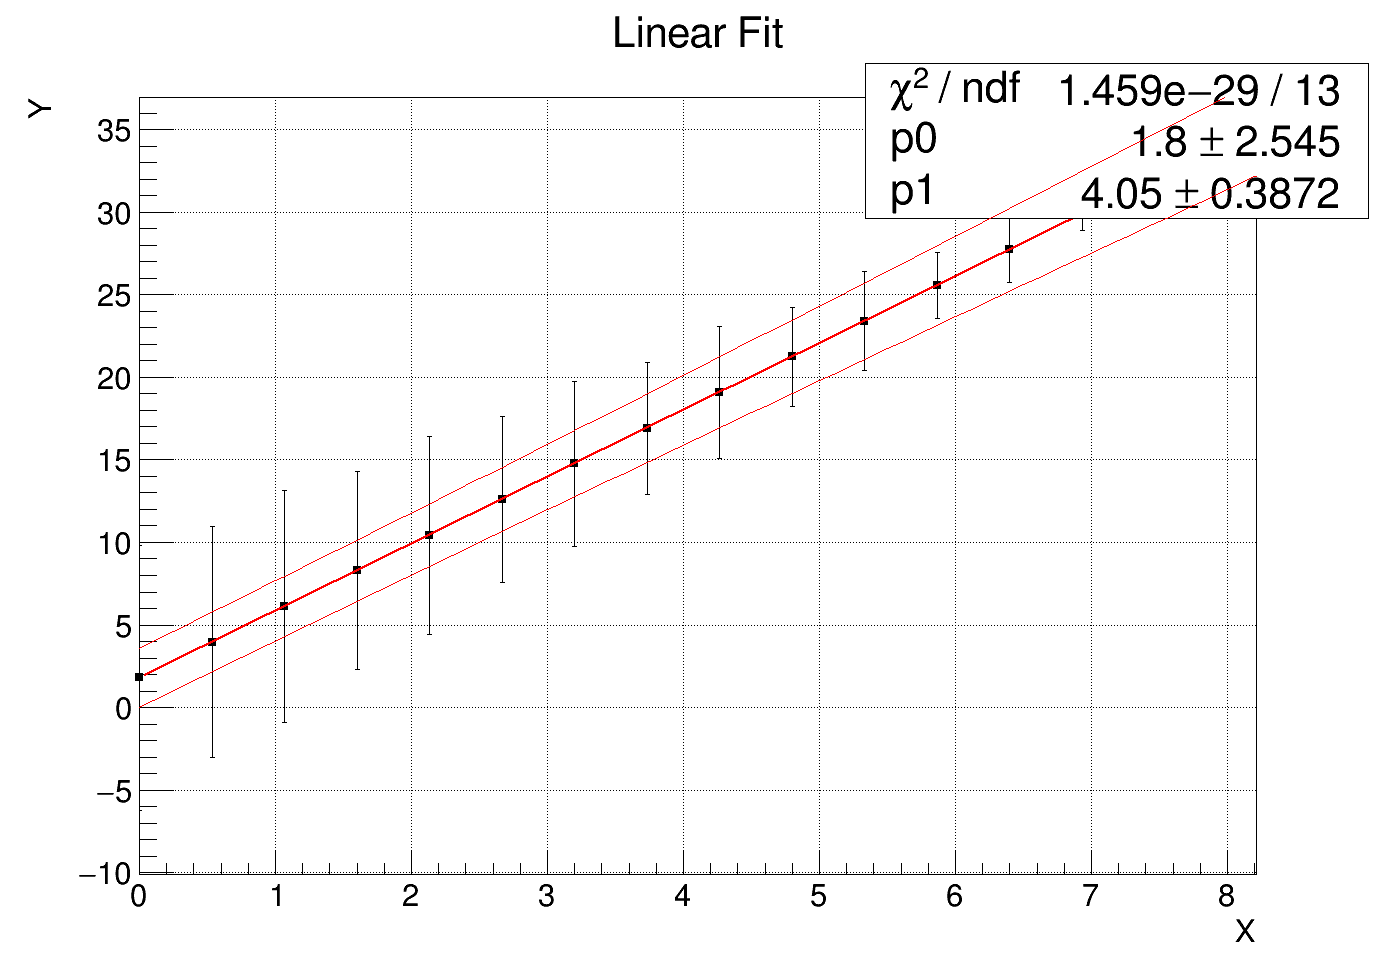

In [12]:
#print (n,x,y)

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Simple Linear Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = TGraphErrors(n,x,y,ex,ey)
grp = TGraph(101,xfiterr,yfitplus)
grm = TGraph(101,xfiterr,yfitminus)

pfit1 = TF1("pfit1","pol1")
gr.SetMarkerStyle(21)
gr.SetTitle("Linear Fit")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
grp.SetLineColor(2)
grm.SetLineColor(2)
grp.Draw("L")
grm.Draw("L")
c1.Draw()